<a href="https://colab.research.google.com/github/jessika2018/Data-analysis-Master---ashrafieh-sales/blob/main/Copy_data_analysis_achrafieh_sales-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on Spinneys - Ashrafieh Sales

Spinneys is a popular retailer company that people buy across the word its product. In this EDA (Exploratary data Analysis), I will explore the top 10 products sold the most  on X months and the top 10 product sold the least on x. I will show the dataset in a graphs using matplotlib and seaborn. Consequently we will take desicions by the end of the analysis. 
The hypothesis suggested is:
 create new compagin including the most frequent itemset purchased along one itemset that purchsed the least.



# Package install and Import
First we will install and import necessary packages

In [155]:
!pip install jovian --upgrade --quiet

In [156]:
pip install seaborn

In [157]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os 

# Loading the dataset  
Now we are ready to load the data set. We will do this using the standard read_excel command from Pandas. Let's take a glimnpse at how the data looks like 


In [158]:
spinneys_dataset_df = pd.read_excel('/content/jessica_data/Ashrafieh_Sales.xlsx')
spinneys_dataset_df.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,Price,Sales Volume,Sales Value $
0,2019,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
4,2019,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036


In [160]:
%%time
print("Dataframe size",spinneys_dataset_df.shape)

Dataframe size (278545, 14)
CPU times: user 1.06 ms, sys: 1 µs, total: 1.06 ms
Wall time: 1.07 ms


In [161]:
spinneys_dataset_df.groupby(by=["Month"], dropna=False).sum()

,Year,Item Number,Price,Sales Volume,Sales Value $
Month,,,,,
Aug,179420454,27993201468,3.964257e+08,152980.220,278494.414017
Jul,189531606,29487043002,3.693037e+08,158502.897,290760.055350
Sep,193430295,30266300504,3.789413e+08,162697.773,298578.816610




```
# This is formatted as code
```

# Data Preparation and Cleaning

In [162]:
spinneys_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278545 entries, 0 to 278544
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              278545 non-null  int64  
 1   Month             278545 non-null  object 
 2   Store Name        278545 non-null  object 
 3   Receipt Number    278545 non-null  object 
 4   Category          278545 non-null  object 
 5   Group             278545 non-null  object 
 6   Sub Group         278545 non-null  object 
 7   Item Number       278545 non-null  int64  
 8   Item Family       278509 non-null  object 
 9   Item Description  278545 non-null  object 
 10  Product Size      278520 non-null  object 
 11  Price             278545 non-null  float64
 12  Sales Volume      278545 non-null  float64
 13  Sales Value $     278545 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 29.8+ MB


In [163]:
spinneys_dataset_df.nunique()

Year                    1
Month                   3
Store Name              1
Receipt Number      67376
Category               10
Group                  99
Sub Group             523
Item Number         11570
Item Family          1236
Item Description    10567
Product Size         1490
Price                 578
Sales Volume          348
Sales Value $        2173
dtype: int64

# Handling Null Values
we can see that for each of the column, there are alot different uniques values for some of them. It makes sense that Receipt Number is large since it is a unique key used to identify transaction. Item Number , Item Family, Item Description, Product Size, Sales Value $, Price and Sales volume contain many unbiques value

In [164]:
spinneys_dataset_df.isnull().values.any()

True

In [165]:
spinneys_dataset_df.isnull().sum().sum()

61

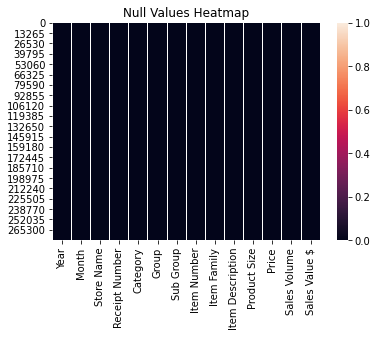

In [166]:
sns.heatmap(spinneys_dataset_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [167]:
spinneys_dataset_df.isnull().sum()

Year                 0
Month                0
Store Name           0
Receipt Number       0
Category             0
Group                0
Sub Group            0
Item Number          0
Item Family         36
Item Description     0
Product Size        25
Price                0
Sales Volume         0
Sales Value $        0
dtype: int64

Above in the heatmap and table, we can see that there are quite few null values in the dataset.There are a total of 61 null value across the entire dataset with 36 missing point under 'Item Family' and 25 under 'Product Size'.
We will have to handle all null data points values before we can dive into EDA and modeling 

In [168]:
spinneys_dataset_df.dropna(subset=['Product Size','Item Family'], inplace=True)

In [184]:
spinneys_dataset_df.isnull().any()

Year                False
Month               False
Store Name          False
Receipt Number      False
Category            False
Group               False
Sub Group           False
Item Number         False
Item Family         False
Item Description    False
Product Size        False
Price               False
Sales Volume        False
Sales Value $       False
dtype: bool

For null values, since the Item family and Product size contains an insignificant portion of data so i will drop them from the dataset. After t, we can see that there are no more null values in the dataset.

# Splitting the dataset
Since the dataset can either contains 3 months. It'd nice to have datasets for both so we can take a deep dive into these 3 months. So we will create three new datasets. One for August, july and the other one for September.

In [197]:
splitting_data_August = spinneys_dataset_df.groupby("Month")["Month"].count()
splitting_data_August.head()

Month
Aug    88847
Name: Month, dtype: int64

In [199]:
splitting_data_August = spinneys_dataset_df[spinneys_dataset_df['Month'] =='Aug'].copy()
splitting_data_August.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,Price,Sales Volume,Sales Value $
93874,2019,Aug,Ashrafieh,000000PD02000672610,BEVERAGES & READY TO EAT,WATER,LOCAL WATER,110804,SANNINE,MINERAL WATER PET,1.5L,750.0,1.0,0.497512
93875,2019,Aug,Ashrafieh,000000PD02000672611,TOBACCO,CIGARETTES,LIGHT,253242,MARLBORO,LIGHT GOLD SOFT SHORT,1PC,2750.0,1.0,1.824212
93876,2019,Aug,Ashrafieh,000000PD02000672612,MEAL SOLUTIONS,RICE,AMERICAN RICE,421855,SPINNEYS,AMERICAN RICE,1KG,1750.0,2.0,2.321725
93877,2019,Aug,Ashrafieh,000000PD02000672612,HEALTH & BEAUTY,FEMININE CARE,DAILY PANTILINERS,149132,FRESHDAYS,FRESH DAY STRING PANTYLINER,24'S,2999.0,1.0,1.989386
93878,2019,Aug,Ashrafieh,000000PD02000672612,CHILLED,DAIRY PRODUCTS,LABAN,427151,BONJUS,LABAN,2KG,4790.0,2.0,6.354892


# Exploratory Analysis and Visualization
First we will begin analysison the entire Dataset consisting of August. revisting the data, let us see how it looked like again 


In [202]:
spinneys_dataset_df

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,Price,Sales Volume,Sales Value $
93874,2019,Aug,Ashrafieh,000000PD02000672610,BEVERAGES & READY TO EAT,WATER,LOCAL WATER,110804,SANNINE,MINERAL WATER PET,1.5L,750.00000,1.0,0.497512
93875,2019,Aug,Ashrafieh,000000PD02000672611,TOBACCO,CIGARETTES,LIGHT,253242,MARLBORO,LIGHT GOLD SOFT SHORT,1PC,2750.00000,1.0,1.824212
93876,2019,Aug,Ashrafieh,000000PD02000672612,MEAL SOLUTIONS,RICE,AMERICAN RICE,421855,SPINNEYS,AMERICAN RICE,1KG,1750.00000,2.0,2.321725
93877,2019,Aug,Ashrafieh,000000PD02000672612,HEALTH & BEAUTY,FEMININE CARE,DAILY PANTILINERS,149132,FRESHDAYS,FRESH DAY STRING PANTYLINER,24'S,2999.00000,1.0,1.989386
93878,2019,Aug,Ashrafieh,000000PD02000672612,CHILLED,DAIRY PRODUCTS,LABAN,427151,BONJUS,LABAN,2KG,4790.00000,2.0,6.354892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182735,2019,Aug,Ashrafieh,000000PD03000756476,BEVERAGES & READY TO EAT,SOFT DRINKS,NON ALCOHOLIC DRINKS,134192,LAZIZA,N/ALC MALT BEER BOTTLE,33CL,999.00000,1.0,0.662687
182736,2019,Aug,Ashrafieh,000000PD03000756477,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.00000,1.0,0.394693
182737,2019,Aug,Ashrafieh,000000PD03000756477,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,142226,ENG.CAKE,CAKE DATE,65G,799.00000,1.0,0.530017
182738,2019,Aug,Ashrafieh,000000PD03000756477,BEVERAGES & READY TO EAT,CAKES,CROISSANT,349091,CHIPITA,CROISSANT CHOCO,50G,550.00000,1.0,0.364842


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


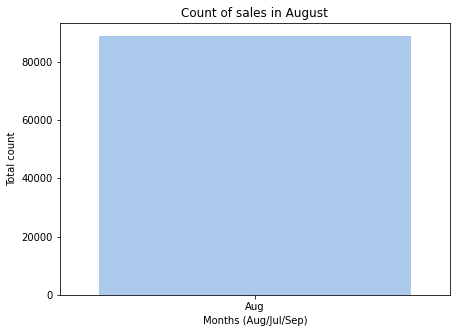

In [203]:
plt.figure(figsize=(7,5))
g = sns.countplot(spinneys_dataset_df.Month, palette="pastel")
plt.title("Count of sales in August")
plt.xlabel("Months (Aug/Jul/Sep)")
plt.ylabel("Total count")
plt.show()